#### 제 1 유형 데이터 전처리
문제에서 요구하는 값을 계산하는 코드를 작성한 후 print()로 답을 출력하고, 우측 상단의 제출 버튼을 클릭하여 답안 제출을 완료한다.

#### 제 2 유형 데이터 분석
요구사항에 따라 코드를 작성 후 csv 파일로 생성하여 제출한다.

#### 제 3 유형 통계적 가설 검정
문제에서 요구하는 값을 계산하는 코드를 작성하여 답을 도출한 후 별도의 제출화면에서 답안을 입력하여 제출한다.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/빅데이터분석기사_실기/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
df.info()
# info()함수를 통해 Age,Cabin, Embarked 변수에 결측치가 있는 걸 확인 가능

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [43]:
# Survived와 Pclass는 숫자(int64)이지만 범주형 변수이므로 astype를 이용하여 범주형 변수로 변경
df["Survived"] = df["Survived"].astype(str)
df["Pclass"] = df["Pclass"].astype(str)

In [44]:
df.describe(include="all") # 데이터프레임 기술 통계 탐색

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891,891,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,2,3,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,0,3,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,549,491,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,NaN,NaN,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,NaN,NaN,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,NaN,NaN,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,NaN,NaN,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,NaN,NaN,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


- `describe()` 함수를 통한 데이터셋 탐색
  - `Survived`는 y(목표함수)이며 0: 사망자, 1: 생존자를 의미한다.
  - `Pclass`는 1,2,3등급으로 3가지의 범주이며, 3등급 승객이 가장 많다.
  - `Name`은 비슷한 이름이 존재하므로 가족과 함께 탐승한 승객이 존재한다.
  - `Sex`는 남성과 여성이 존재하며 남성이 577명, 여성 314명으로 남성의 비율이 약 두배가량 높다.
  - `Age`는 0.42세부터 80세까지 존재하는데 177개의 결측치가 존재
  - `Sib`, `Parch`는 모두 가족관계를 나타내는 변수(귀찮아서 이하 생략)
  - 이하 변수들은 생략하고 필요시 더 설명하는 걸로 ...

In [45]:
# groupby를 통해 Pclass의 값 별로 그룹핑 후 size()를 통해 각 그룹별 빈도수를 구함
grouped = df.groupby("Pclass")
grouped.size()

Pclass
1    216
2    184
3    491
dtype: int64

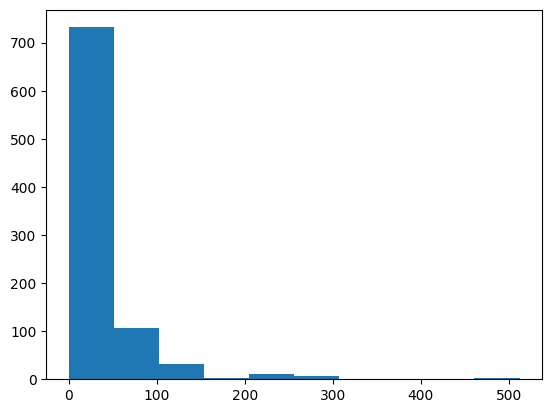

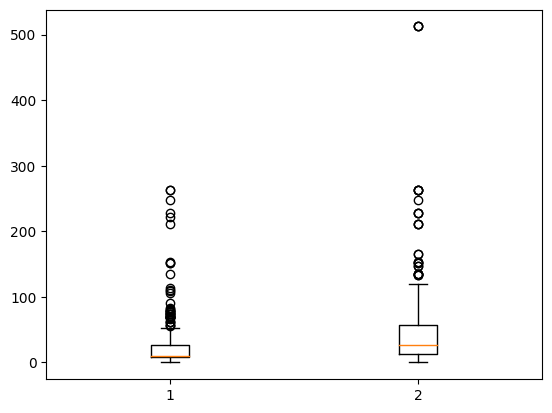

In [46]:
#Histogram
plt.hist(df["Fare"])
plt.show()

#데이터분석
data_0 = df[df["Survived"] == "0"]["Fare"]
data_1 = df[df["Survived"] == "1"]["Fare"]

# Boxplot - Survived 값에 따른 Fare값 분포
fig, ax = plt.subplots()
ax.boxplot([data_0, data_1])
plt.show()

#### 1. 표준 정규화
- 데이터 범위가 같아지도록 변수별로 값을 비례적으로 조정하는 과정을 데이터 스케일링(scaling)이라고 하며 표준정규화(표준화)와 min-max 정규화가 있음
- 변수들의 측정단위나 값 범위가 다를 때 사용
<br><br>
1. 정규분포를 따르는 데이터 생성
 - 한국인 1000명의 연간 육류소비량이 `53.9kg`,표준편차 `5kg`의 정규분포를 따르고, 일본인 성인 남성 1000명의 육류소비량이 `32.7kg`, 표준편차 `4kg`의 정규분포를 따른다고 했을 때 두 집단의 육류소비량을 평균이 `0`, 표준편차가 `1`인 표준정규분포로 표준화 해본다.


In [11]:
import numpy as np
import pandas as pd

#한국인, 일본인 각 성인 1000명 육류소비량 데이터 생성
#난수 발생이라 실행마다 결과값이 달라짐
meat_consumption_korea = 5*np.random.randn(1000) + 53.9
meat_consumption_japan = 4*np.random.randn(1000) + 32.7

meat_consumption = pd.DataFrame({"한국인":meat_consumption_korea, "일본인":meat_consumption_japan})

meat_consumption.head(6)

,한국인,일본인
0,53.413079,30.808418
1,47.868900,25.834769
2,60.348729,28.058279
3,58.329539,37.153792
4,53.614744,35.255587
5,54.336616,35.500826


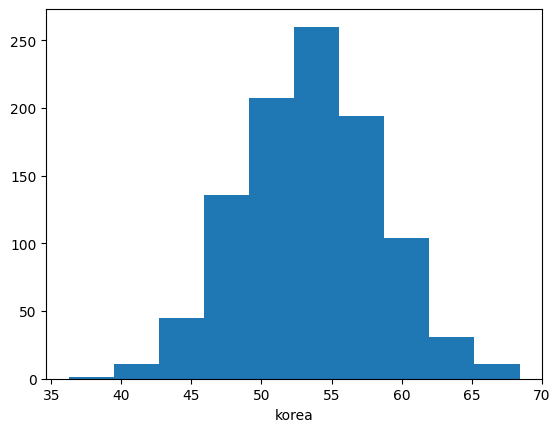

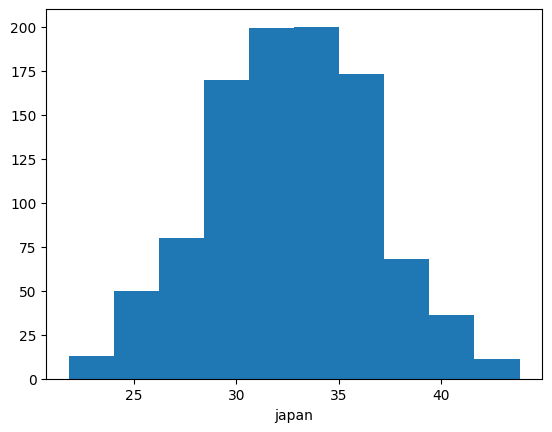

In [13]:
import matplotlib.pyplot as plt

plt.hist(meat_consumption_korea)
plt.xlabel("korea")
plt.show()

plt.hist(meat_consumption_japan)
plt.xlabel("japan")
plt.show()

##### 파이썬에서 z-score을 구할 수 있는 방법
  1. numpy > z=(x-mean(x))/std(x)
  2. scipy.stats > zscore(x)
  3. sklearn.preprocessing > StandardScaler().fit_transform()

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
meat_consumption["한국인_정규화"] = scaler.fit_transform(meat_consumption[["한국인"]])

scaler = StandardScaler()
meat_consumption["일본인_정규화"] = scaler.fit_transform(meat_consumption[["일본인"]])

meat_consumption.head()

,한국인,일본인,한국인_정규화,일본인_정규화
0,53.413079,30.808418,-0.027454,-0.460512
1,47.868900,25.834769,-1.145247,-1.710013
2,60.348729,28.058279,1.370881,-1.151413
3,58.329539,37.153792,0.963781,1.133600
4,53.614744,35.255587,0.013205,0.656724


In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
meat_consumption["한국인_mm정규화"] = scaler.fit_transform(meat_consumption[["한국인"]])

scaler = MinMaxScaler()
meat_consumption["일본인_mm정규화"] = scaler.fit_transform(meat_consumption[["일본인"]])

meat_consumption.head()


,한국인,일본인,한국인_정규화,일본인_정규화,한국인_mm정규화,일본인_mm정규화
0,53.413079,30.808418,-0.027454,-0.460512,0.533661,0.408458
1,47.868900,25.834769,-1.145247,-1.710013,0.361457,0.182516
2,60.348729,28.058279,1.370881,-1.151413,0.749085,0.283525
3,58.329539,37.153792,0.963781,1.133600,0.686368,0.696715
4,53.614744,35.255587,0.013205,0.656724,0.539925,0.610483


#### 2. 정규분포 전환
- 왜도는 분포의 대칭 척도이다. 값은 양수, 음수 또는 정의되지 않을 수 있다.
- 왜도가 0이 아닌 경우 분포가 한쪽으로 치우쳐 있으며, 이 분포에서는 중심 경향 측정값(평균, 중위값, 최빈값)이 동일하지 않다.

In [24]:
df = pd.read_csv("/content/drive/MyDrive/빅데이터분석기사_실기/USJudgeRatings.csv")
df.head(5)

,Unnamed: 0,CONT,INTG,DMNR,DILG,CFMG,DECI,PREP,FAMI,ORAL,WRIT,PHYS,RTEN
0,"AARONSON,L.H.",5.7,7.9,7.7,7.3,7.1,7.4,7.1,7.1,7.1,7.0,8.3,7.8
1,"ALEXANDER,J.M.",6.8,8.9,8.8,8.5,7.8,8.1,8.0,8.0,7.8,7.9,8.5,8.7
2,"ARMENTANO,A.J.",7.2,8.1,7.8,7.8,7.5,7.6,7.5,7.5,7.3,7.4,7.9,7.8
3,"BERDON,R.I.",6.8,8.8,8.5,8.8,8.3,8.5,8.7,8.7,8.4,8.5,8.8,8.7
4,"BRACKEN,J.J.",7.3,6.4,4.3,6.5,6.0,6.2,5.7,5.7,5.1,5.3,5.5,4.8


In [25]:
import scipy.stats as ss

# 지정한 컬럼의 왜도 계산
print(ss.skew(df["CONT"])) # 1.08 수준의 양의 왜도를 가짐
print(ss.skew(df["PHYS"])) # -1.56 수준의 음의 왜도를 가짐

1.0859724796276253
-1.5582154642293153


- 왜도에 따라서 변수 변환식이 다름

|왜도|제곱근 변환|로그 변환|역수 변환|
|-|-|-|-|
|양수(Positive)|sqrt(x)| log(x) or log10(x)| 1/x|
|음수(Negative)|sqrt(max(x+1)-x) | log(max(x+1)-x) or log10(max(x+1)-x)|1/(max(x+1)-x)

In [29]:
# 로그 변환
df["CONT1"] = np.log(df["CONT"])
df["PHYS1"] = np.log(max(df["PHYS"]+1)-df["PHYS"])

# 왜도 변환
print(ss.skew(df["CONT1"]))
print(ss.skew(df["PHYS1"]))

0.6555571886692603
0.5824357748750443


In [30]:
#로그10 변환
df["CONT2"] = np.log10(df["CONT"])
df["PHYS2"] = np.log10(max(df["PHYS"]+1)-df["PHYS"])

# 왜도 변환
print(ss.skew(df["CONT2"]))
print(ss.skew(df["PHYS2"]))

0.6555571886692441
0.5824357748750438


#### 3. 범주화(Categorization), 이산형화(Discretization)
- 연속형 범수를 범주형 변수로 변환하는 작업
- `몇개의 범수`로 나눌지와 `어떤 기준`으로 나눌지를 정하는 것이 중요
- cut(),과 qcut()등을 사용해서 범주화 함

73.5


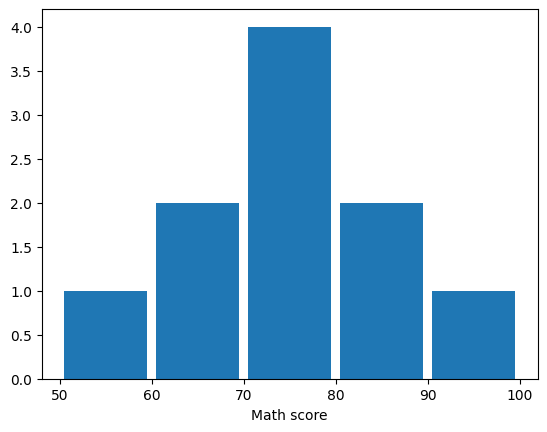

In [37]:
# 수학점수
data = [["철수",52], ["영희",92],["미영", 84], ["시완", 71],["미경", 65]
        ,["영환", 81], ["숙경", 66], ["부영", 77], ["민섭", 73], ["보연", 74]]
df = pd.DataFrame(data, columns=["이름","수학점수"])

print(np.mean(df["수학점수"]))

plt.hist(df["수학점수"], bins=5,range=[50,100], rwidth=0.9)
plt.xlabel("Math score")
plt.show()

1. 조건을 사용해서 구간을 직접 지정
  - 위의 시험 성적을 가지고 A, B, C, D, F 등급을 지정
  - 직관적인 방법이고, 구간 간 규칙성이 존재하지 않을 경우 유용하게 사용할 수 있다

In [38]:
df["등급"] = 0

df.loc[(df["수학점수"]<60), "등급"] = "F"
df.loc[(df["수학점수"]<70) & (df["수학점수"] >= 60), "등급"] = "D"
df.loc[(df["수학점수"]<80) & (df["수학점수"] >= 70), "등급"] = "C"
df.loc[(df["수학점수"]<90) & (df["수학점수"] >= 80), "등급"] = "B"
df.loc[(df["수학점수"]<100) & (df["수학점수"] >= 90), "등급"] = "A"

df

,이름,수학점수,등급
0,철수,52,F
1,영희,92,A
2,미영,84,B
3,시완,71,C
4,미경,65,D
5,영환,81,B
6,숙경,66,D
7,부영,77,C
8,민섭,73,C
9,보연,74,C


2. 위의 시험 성적을 가지고 `cut()`를 이용하여 등급 매기기
  - inculde_lowest=True 옵션을 주면 왼쪽 경계 옵션까지 줄 수 있음

In [39]:
df["등급"] = pd.cut(x=df["수학점수"],
                  bins=[0,60,70,80,90,100],
                  labels=["F","D","C","B","A"],
                  include_lowest=True)
df

,이름,수학점수,등급
0,철수,52,F
1,영희,92,A
2,미영,84,B
3,시완,71,C
4,미경,65,D
5,영환,81,B
6,숙경,66,D
7,부영,77,C
8,민섭,73,C
9,보연,74,C


3. qcut() 함수 사용
  - cut()함수는 bins를 직접 수치로 지정해야하는 반면, qcut()함수는 나누고자 하는 `범주 개수를 정해주면` 각 범주에 균등한 수의 데이터가 채워지도록 범주를 나눔
  - 동일한 구간을 지정하는 것이 아니라, 동일한 개수로 나누어지도록 구간을 지정할 때 qcut()를 사용

In [40]:
df["등급_qcut"] = pd.qcut(x=df["수학점수"], q=5, labels=["F", "D", "C", "B", "A"],)
df

,이름,수학점수,등급,등급_qcut
0,철수,52,F,F
1,영희,92,A,A
2,미영,84,B,A
3,시완,71,C,D
4,미경,65,D,F
5,영환,81,B,B
6,숙경,66,D,D
7,부영,77,C,B
8,민섭,73,C,C
9,보연,74,C,C


#### 4. 차원축소: PCA(Principal Componant Analysis, 주성분 분석)
- 주성분 분석은 여러 변수들의 변량을 '주성분'이라고 불리는, 서로 상관성이 높은 여러 변수들의 선형조합으로 만든 새로운 변수들로 요약, 축소 하는 기법
- 첫번째 주성분으로 전체 변동을 가장 많이 설명할 수 있고, 2번째 주성분은 첫 번째 주성분과 상관성이 낮거나 없어서 첫번째 주성분이 설명하지 못하는 나머지 변동을 정보의 손실 없이 가장 많이 설명할 수 있도록 변수들의 선형조합을 만들게 됨

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()

In [55]:
df = pd.DataFrame(iris["data"], columns=["sepal_length", "sepal_width","petal_length","petal_width"])
iris_species = iris["target"]

df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [63]:
#주성분 분석전 변수를 표준화 하거나 정규화 시켜줘야함
#변수 정규화
from sklearn.preprocessing import StandardScaler

df["sepal_length"] = StandardScaler().fit_transform(df[["sepal_length"]])
df["sepal_width"] = StandardScaler().fit_transform(df[["sepal_width"]])
df["petal_length"] = StandardScaler().fit_transform(df[["petal_length"]])
df["petal_width"] = StandardScaler().fit_transform(df[["petal_width"]])

# PCA 수행
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
p_score = pca.fit_transform(df)
print(p_score.shape)
print(pca.explained_variance_ratio_)

(150, 4)
[0.72962445 0.22850762 0.03668922 0.00517871]


#### 5. 결측치 처리
- 타이타닉 데이터셋을 이용해서 진행

##### 5.1 결측치 확인과 제거
- 결측값 식별: info()함수, isnull()함수 등으로 확인 가능

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/빅데이터분석기사_실기/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [66]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [68]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### 5.2. 결측치 대체
- 단순 대치법
    - 완전 분석법: 결측값이 있는 행을 삭제
    - 평균 대치법: 결측값을 평균으로 대체
    - 단순확률 대치법: 확률분포를 이용한 추정값으로 대치 또는 주변값으로 대치
- 다중 대치법

In [71]:
# 결측치가 있는 행 전체를 데이터 셋에서 제거
# dropna()함수를 사용하여 결측값을 제거
df_1 = df.dropna(axis=1)

print(df_1.isnull().sum().sum())
df.shape

0


(891, 12)

dropna() 함수 사용 예

|용도|사용예|
|-|-|
|결측치가 있는 모든 행 삭제|df.dropna(axis=0)|
|결측치가 있는 모든 열 삭제|df.dropna(axis=1)|
|Age열의 결측치가 있는 모든 행 삭제|df.dropna(subset=["Age"],axis=0)|

In [72]:
# 결측치를 지정값으로 대체
#fillna()함수를 사용하여 결측값을 지정값으로 대체

print(df["Age"].isnull().sum())

age_mean = df["Age"].mean()
df["Age"].fillna(age_mean, inplace=True)

print(df["Age"].isnull().sum())

177
0


In [73]:
# 최빈값으로 대체
from scipy.stats import mode

print(df["Embarked"].isnull().sum())
embarked_mode = df["Embarked"].mode()

df["Embarked"].fillna(embarked_mode[0], inplace=True)
print(df["Embarked"].isnull().sum())

2
0


In [74]:
# 결측치를 인접한 값으로 대체
# fillna()함수에 method="ffill" 조건을 추가해주면 됨
df["Embarked"].fillna(method="ffill", inplace=True)

In [78]:
df = pd.read_csv('/content/drive/MyDrive/빅데이터분석기사_실기/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [79]:
# 결측치를 평균값으로 대체

print(df.groupby("Sex")["Age"].mean())
print(df.groupby("Pclass")["Age"].mean())

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64
Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


In [80]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [81]:
df["Age"].fillna(df.groupby("Pclass")["Age"].transform('mean'), inplace=True)

df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.00000,0,0,370376,7.75,NaN,Q


#### 6. 이상치(Outlier) 처리
- 이상값은 데이터의 범위에서 벗어난(정상범위 밖에 있는) 값
- 사분위 범위, 정규분포를 이용해 식별, 식별된 이상값은 제거여부를 판단

In [82]:
# 데이터 준비
# 이상값이 포함된 데이터 제작
# 평균 50, 표준편차 10의 정규분포를 따르는 데이터 200개를 생성, 매우 작은 이상치와 매우 큰 이상치 추가

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = 10 * np.random.randn(200) + 50
df = pd.DataFrame({"값":data})

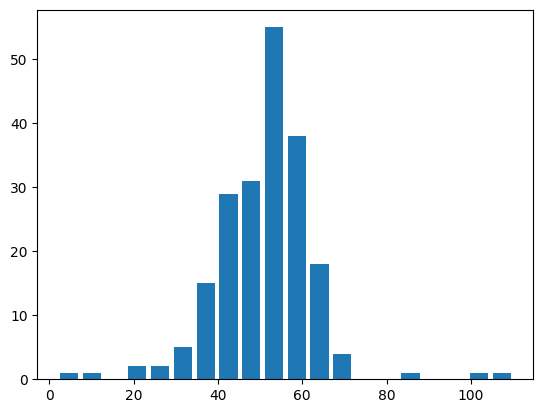

In [83]:
# 임의의 이상치 삽입
df.loc[201] = 2
df.loc[202] = 100
df.loc[203] = 10
df.loc[204] = 110

# 분포 시각화
plt.hist(df["값"], bins=20, rwidth=0.8)
plt.show()

- IQR(Interquartile Range, 사분위범위) 방법

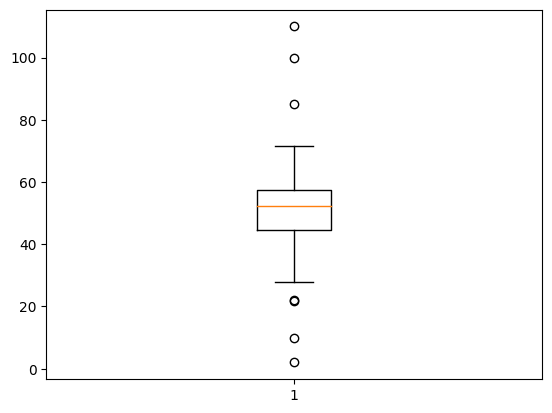

In [84]:
plt.boxplot(df["값"])
plt.show()

In [87]:
Q1 = df["값"].describe()["25%"]
Q2 = df["값"].describe()["50%"]
Q3 = df["값"].describe()["75%"]

print("Q1:", Q1, "\nQ2:", Q2, "\nQ3:", Q3)

Q1: 44.6416164762058 
Q2: 52.303102571009504 
Q3: 57.36546112744067


In [89]:
# IQR 값 구하기
# IQR = Q3 - Q1
# 이상치 > Q3 + IQR*1.5
# 이상치 < Q1 - IQR*1.5
IQR = Q3 - Q1
upper_condition = df["값"] > (Q3 + (1.5*IQR))
lower_condition = df["값"] < (Q1 - (1.5*IQR))

upperOutlier = df[upper_condition]
lowerOutlier = df[lower_condition]

print(lowerOutlier, "\n", upperOutlier)

             값
90   21.660971
123  22.189007
201   2.000000
203  10.000000 
              값
36    85.05934
202  100.00000
204  110.00000


#### 7. 평활화(Smootiong)
- 데이터의 분포를 매끄럽게 함으로써 데이터에서 중요하지 않은 것(잡음 등을) 제거하고 패턴을 알아내는 방법
  - 평활화의 목적: 값의 변화를 매끄럽게 하여 데이터의 추세를 알기 쉽게 하는 것
  - 필터링을 사용하여 수행, 여기서는 이동평균을 이용

In [91]:
df = pd.read_csv("/content/drive/MyDrive/빅데이터분석기사_실기/lynx.csv")

df.head()

,rownames,time,value
0,1,1821,269
1,2,1822,321
2,3,1823,585
3,4,1824,871
4,5,1825,1475


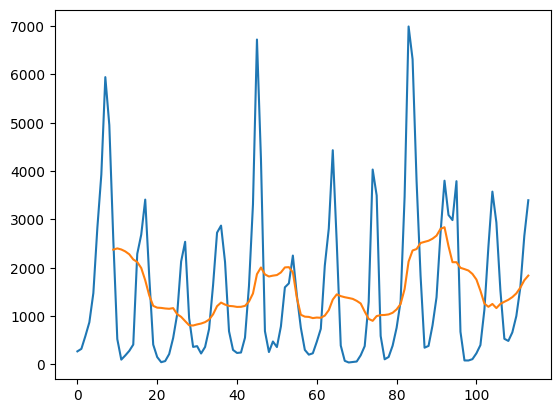

In [92]:
# 단순 이동 평균(Simple Moving Average)
# rolling(n).mean(), n=데이터갯수

# 10년 단순 이동 평균
df["sma"] = df["value"].rolling(10).mean()

plt.plot(df["value"])
plt.plot(df["sma"])
plt.show()

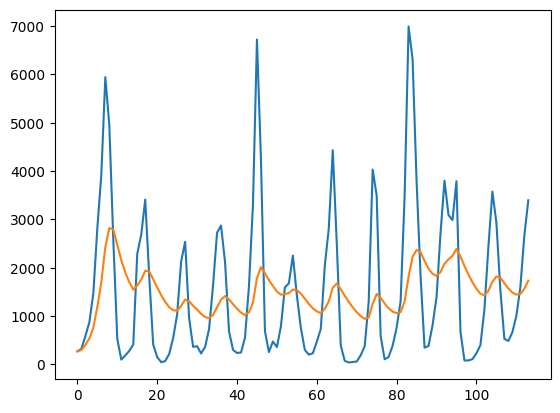

In [93]:
# 지수가중이동평균(Exponentially-wide Moving Average)
# ewm(n).mean(), n=데이터갯수

# 10년 지수가중이동평균
df["ewm"] = df["value"].ewm(10).mean()

plt.plot(df["value"])
plt.plot(df["ewm"])
plt.show()